# 1. Analyzing the NFL games

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

In [2]:
games_df = pd.read_csv('../input/beginners-sports-analytics-nfl-dataset/games.csv')

In [3]:
games_df.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1
1,2018090901,09/09/2018,13:00:00,CLE,PIT,1
2,2018090902,09/09/2018,13:00:00,IND,CIN,1
3,2018090903,09/09/2018,13:00:00,MIA,TEN,1
4,2018090900,09/09/2018,13:00:00,BAL,BUF,1


In [4]:
games_df.shape

(253, 6)

In [5]:
# Converting to datetime.date values
games_df['gameDate'] = pd.to_datetime(games_df['gameDate']).dt.date
games_df['gameTimeEastern'] = pd.to_datetime(games_df['gameTimeEastern']).dt.time
games_df.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,2018-09-06,20:20:00,PHI,ATL,1
1,2018090901,2018-09-09,13:00:00,CLE,PIT,1
2,2018090902,2018-09-09,13:00:00,IND,CIN,1
3,2018090903,2018-09-09,13:00:00,MIA,TEN,1
4,2018090900,2018-09-09,13:00:00,BAL,BUF,1


In [6]:
games_df['gameDate'].value_counts().reset_index()

,index,gameDate
0,2018-12-30,16
1,2018-09-16,14
2,2018-12-09,14
3,2018-09-23,14
4,2018-12-02,14
5,2018-09-30,13
6,2018-10-14,13
7,2018-12-23,13
8,2018-10-07,13
9,2018-12-16,12


**There were a total of 50 different game dates.**

In [7]:
# Checking the frequency of games in relation to game dates
date_dist = games_df['gameDate'].value_counts().reset_index()

date_dist.columns = ['date', 'frequency']
date_dist.head()

,date,frequency
0,2018-12-30,16
1,2018-09-16,14
2,2018-12-09,14
3,2018-09-23,14
4,2018-12-02,14


In [8]:
sorted_date_dist = date_dist.sort_values('date').set_index('date')
sorted_date_dist.head()

,frequency
date,
2018-09-06,1
2018-09-09,10
2018-09-10,2
2018-09-13,1
2018-09-16,14


**Let us plot the distribution using a bar plot.**

<AxesSubplot:xlabel='date'>

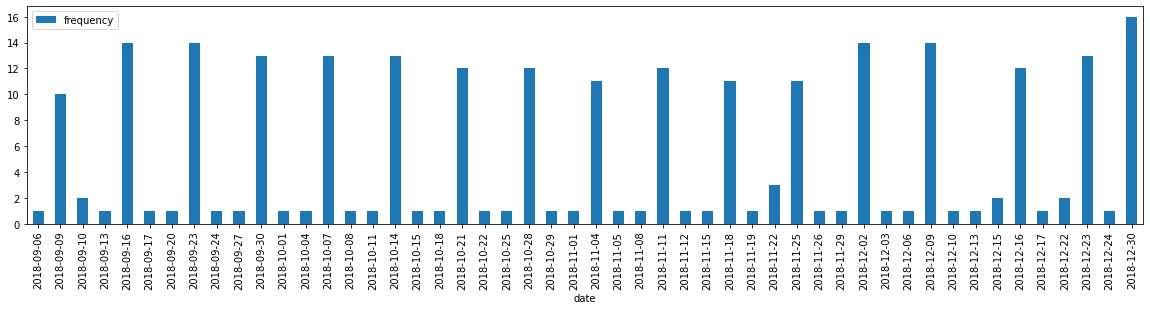

In [9]:
# Plotting a bar plot
sorted_date_dist.plot(kind='bar', figsize=(20,4))

**We can do the same analysis for the time, day and week as well. So, let us convert our code to a Python function.**

True

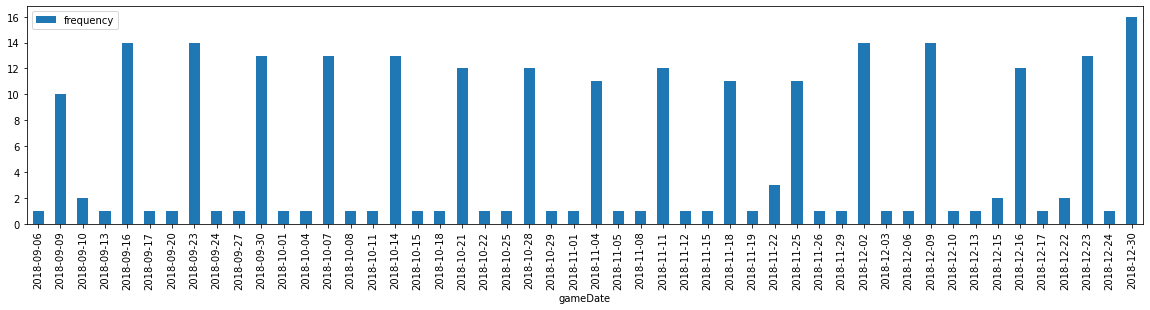

In [10]:
def find_dist(df, col_name):
    
    # Checking the frequency of games in relation to the column values
    dist = df[col_name].value_counts().reset_index()
    
    # Renaming the columns
    dist.columns = [col_name, 'frequency']
        
    # Sorting the DataFrame based on the column values
    sorted_dist = dist.sort_values(col_name, ascending=True).set_index(col_name)

    # Plotting a bar plot
    sorted_dist.plot(kind='bar', figsize=(20,4))

    # Return a boolean indicating the function was successfully executed
    return True

# Visualizing the frequency distribution of games in relation to the date
find_dist(games_df, 'gameDate')

In [11]:
# Looking at the first five rows
games_df.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,2018-09-06,20:20:00,PHI,ATL,1
1,2018090901,2018-09-09,13:00:00,CLE,PIT,1
2,2018090902,2018-09-09,13:00:00,IND,CIN,1
3,2018090903,2018-09-09,13:00:00,MIA,TEN,1
4,2018090900,2018-09-09,13:00:00,BAL,BUF,1


True

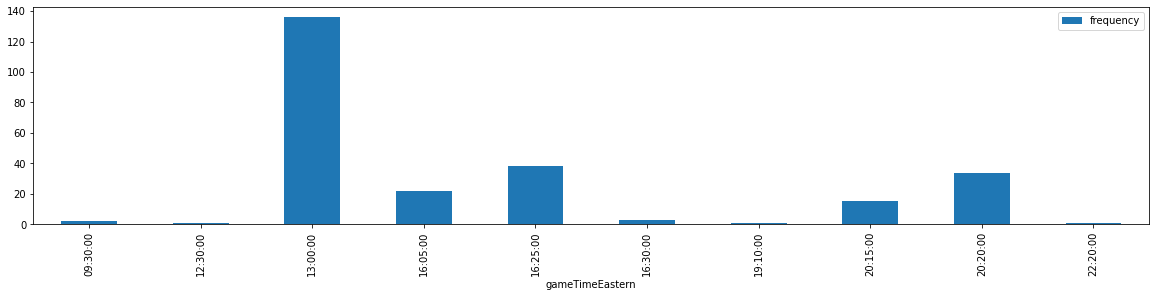

In [12]:
# Visualizing frequency distribution of games in relation to the time
find_dist(games_df, 'gameTimeEastern')

True

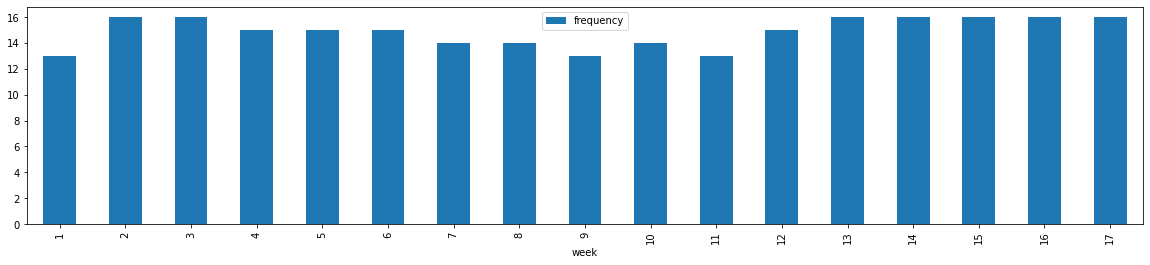

In [13]:
# Visualizing frequency distribution of games in relation to the week
find_dist(games_df, 'week')

In [14]:
# Looking at the first five rows
games_df.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,2018-09-06,20:20:00,PHI,ATL,1
1,2018090901,2018-09-09,13:00:00,CLE,PIT,1
2,2018090902,2018-09-09,13:00:00,IND,CIN,1
3,2018090903,2018-09-09,13:00:00,MIA,TEN,1
4,2018090900,2018-09-09,13:00:00,BAL,BUF,1


In [15]:
# Creating a column containing the day of the week information extracted from the date
games_df['gameDay'] = games_df['gameDate'].apply(lambda x: x.strftime('%A'))

# Looking at the first five rows
games_df.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week,gameDay
0,2018090600,2018-09-06,20:20:00,PHI,ATL,1,Thursday
1,2018090901,2018-09-09,13:00:00,CLE,PIT,1,Sunday
2,2018090902,2018-09-09,13:00:00,IND,CIN,1,Sunday
3,2018090903,2018-09-09,13:00:00,MIA,TEN,1,Sunday
4,2018090900,2018-09-09,13:00:00,BAL,BUF,1,Sunday


True

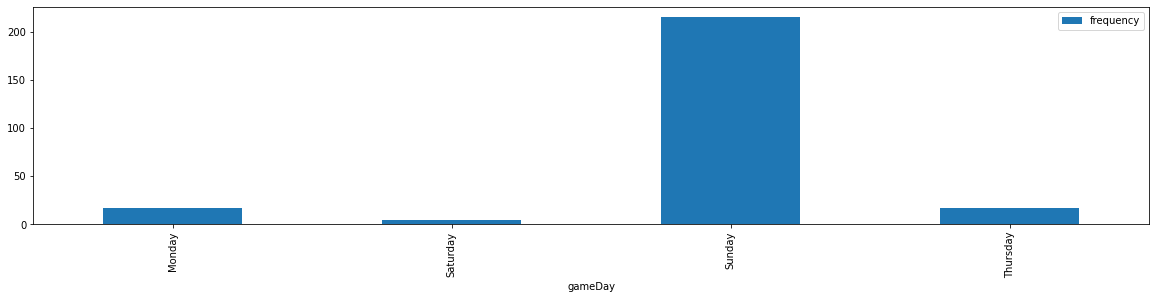

In [16]:
# Visualizing frequency distribution of games in relation to the day of the week
find_dist(games_df, 'gameDay')

In [17]:
import seaborn as sns
import datetime

In [18]:
# Reading in the CSV file as a DataFrame 
players_df = pd.read_csv('../input/beginners-sports-analytics-nfl-dataset/players.csv')

In [19]:
# Looking at the first five rows
players_df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell


In [20]:
# Viewing the shape of the DataFrame
players_df.shape

(1303, 7)

In [21]:
# Converting to datetime.date values
players_df['birthDate'] = pd.to_datetime(players_df['birthDate']).dt.date

# Extracting the year
players_df['birthYear'] = pd.to_datetime(players_df['birthDate']).dt.year

# Looking at the first five rows
players_df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,1993


In [22]:
# Finding the age of the players
players_df['age'] = 2018 - players_df['birthYear']

# Looking at the first five rows
players_df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991,27
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994,24
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,1993,25


In [23]:
def find_dist(df, col_name):
    
    # Checking the frequency of games in relation to the column values
    dist = df[col_name].value_counts().reset_index()
    
    # Renaming the columns
    dist.columns = [col_name, 'frequency']
        
    # Sorting the DataFrame based on the column values
    sorted_dist = dist.sort_values(col_name, ascending=True).set_index(col_name)

    # Plotting a bar plot
    sorted_dist.plot(kind='bar', figsize=(20,4))

    # Return a boolean indicating the function was successfully executed
    return True

True

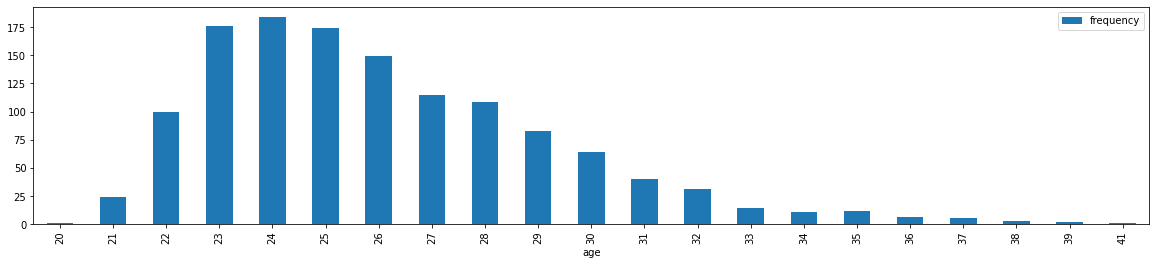

In [24]:
# Visualizing frequency distribution of players in relation to their age
find_dist(players_df, 'age')

In [25]:
# Looking at the first five rows
players_df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991,27
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994,24
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,1993,25


True

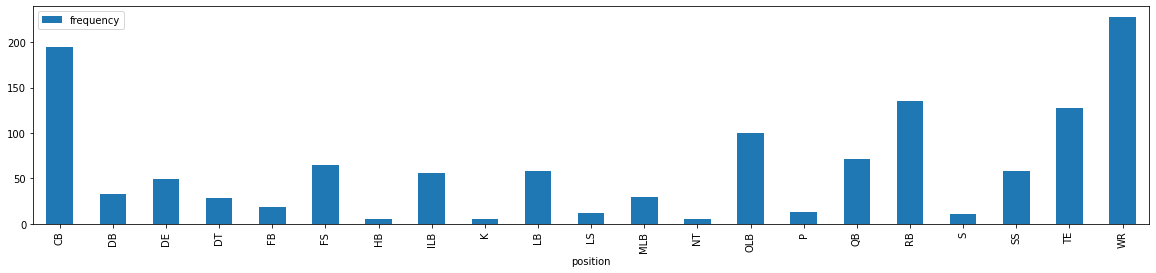

In [26]:
# Visualizing frequency distribution of players in relation to their positions
find_dist(players_df, 'position')

In [27]:
# Selecting position = CB
players_df.query('position == "CB"')

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
6,2556445,70,211,1992-10-20,Florida,CB,Brian Poole,1992,26
28,2552689,71,193,1994-01-02,Florida State,CB,Ronald Darby,1994,24
29,2555383,72,191,1994-04-06,Louisiana State,CB,Jalen Mills,1994,24
...,...,...,...,...,...,...,...,...,...
1228,2561316,70,185,1996-02-02,Utah State,CB,Jalen Davis,1996,22
1241,2556371,72,200,1992-09-09,Texas A&M,CB,Brandon Williams,1992,26
1248,2558858,5-11,195,1994-06-25,Auburn,CB,Joshua Holsey,1994,24
1278,2558819,6-2,188,1994-12-04,Mississippi,CB,Derrick Jones,1994,24


True

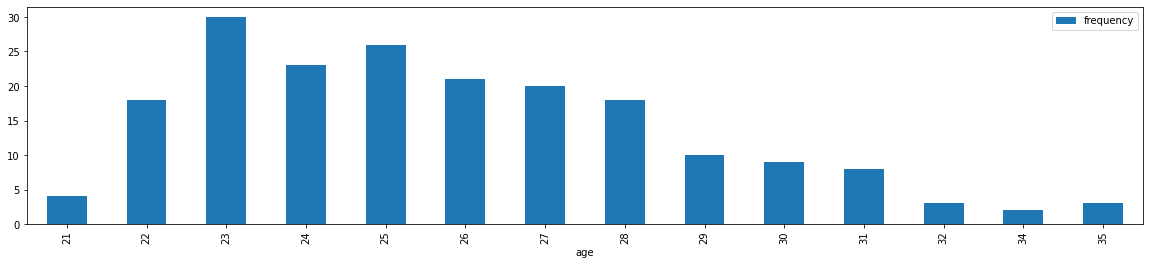

In [28]:
# Visualizing frequency distribution of players in relation to the CB position
find_dist(players_df.query('position == "CB"'), 'age')

True

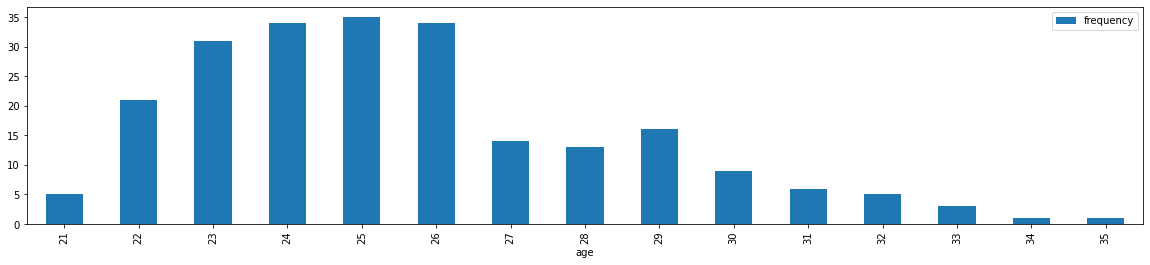

In [29]:
# Visualizing frequency distribution of players in relation to the WR position
find_dist(players_df.query('position == "WR"'), 'age')

In [30]:
# Looking at the first twenty rows
players_df.head(20)

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991,27
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994,24
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,1993,25
5,2555543,73,216,1995-07-26,Florida,FS,Keanu Neal,1995,23
6,2556445,70,211,1992-10-20,Florida,CB,Brian Poole,1992,26
7,2507763,6-0,200,1986-08-01,Mississippi,WR,Mike Wallace,1986,32
8,2532842,78,243,1989-01-20,Arizona,QB,Nick Foles,1989,29
9,2540158,77,250,1990-11-10,Stanford,TE,Zach Ertz,1990,28


In [31]:
# Fixing the inconsistency by converting all data to inches
players_df['height'] = players_df['height'].apply(lambda x: int(x[0])*12 + int(x[2]) if '-' in x else int(x))

# Looking at the first twenty rows
players_df.head(20)

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991,27
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994,24
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,1993,25
5,2555543,73,216,1995-07-26,Florida,FS,Keanu Neal,1995,23
6,2556445,70,211,1992-10-20,Florida,CB,Brian Poole,1992,26
7,2507763,72,200,1986-08-01,Mississippi,WR,Mike Wallace,1986,32
8,2532842,78,243,1989-01-20,Arizona,QB,Nick Foles,1989,29
9,2540158,77,250,1990-11-10,Stanford,TE,Zach Ertz,1990,28


In [32]:
# Extracting the height values
players_df['height'].values

array([72, 70, 69, ..., 78, 69, 74])

In [33]:
# Assigning the height and weight values
height = players_df['height'].values
weight = players_df['weight'].values

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


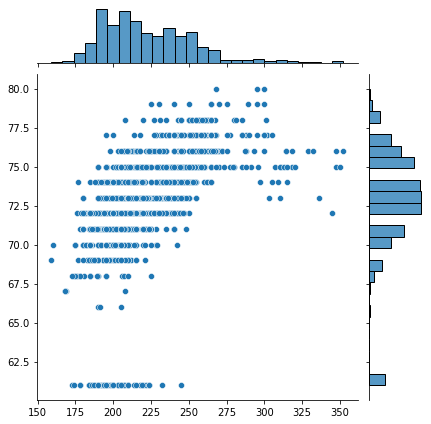

In [34]:
# Plotting a joint plot
sns.jointplot(weight, height)

In [35]:
# Reading in the CSV file as a DataFrame 
plays_df = pd.read_csv('../input/beginners-sports-analytics-nfl-dataset/plays.csv')

In [36]:
# Looking at the first five rows
plays_df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


In [37]:
plays_df.shape

(19239, 27)

In [38]:
import matplotlib.patches as patches

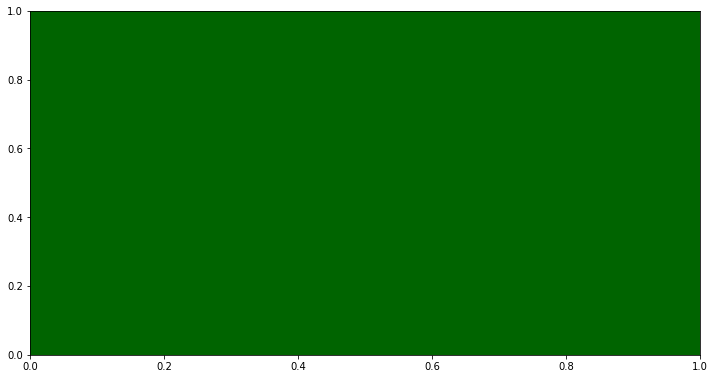

In [39]:
# Create a rectangle defined via an anchor point *xy* and its *width* and *height*
rect = patches.Rectangle((0, 0), 120, 53.3, facecolor='darkgreen', zorder=0)

# Creating a subplot to plot our field on
fig, ax = plt.subplots(1, figsize=(12, 6.33))

# Adding the rectangle to the plot
ax.add_patch(rect)

**Let us add a line plot to create some lines on the field by using the plot() method.**

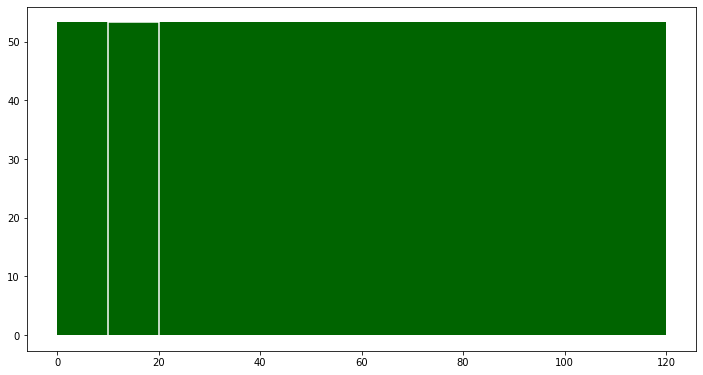

In [40]:
# Create a rectangle defined via an anchor point *xy* and its *width* and *height*
rect = patches.Rectangle((0, 0), 120, 53.3, facecolor='darkgreen', zorder=0)

# Creating a subplot to plot our field on
fig, ax = plt.subplots(1, figsize=(12, 6.33))

# Adding the rectangle to the plot
ax.add_patch(rect)

# Plotting a line plot for marking the field lines
plt.plot([10, 10, 20, 20],
         [0, 53.3, 53.3, 0],
         color='white', zorder=0)

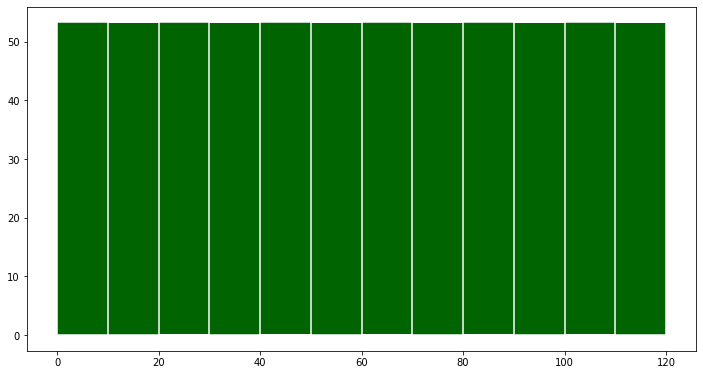

In [41]:
# Create a rectangle defined via an anchor point *xy* and its *width* and *height*
rect = patches.Rectangle((0, 0), 120, 53.3, facecolor='darkgreen', zorder=0)

# Creating a subplot to plot our field on
fig, ax = plt.subplots(1, figsize=(12, 6.33))

# Adding the rectangle to the plot
ax.add_patch(rect)

# Plotting a line plot for marking the field lines
plt.plot([10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
          80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
         [0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 
          0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
         color='white', zorder = 0)

(0.0, 120.0, -5.0, 58.3)

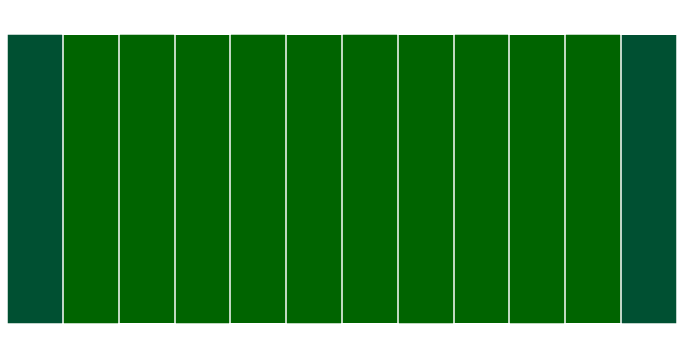

In [42]:
# Create a rectangle defined via an anchor point *xy* and its *width* and *height*
rect = patches.Rectangle((0, 0), 120, 53.3, facecolor='darkgreen', zorder=0)

# Creating a subplot to plot our field on
fig, ax = plt.subplots(1, figsize=(12, 6.33))

# Adding the rectangle to the plot
ax.add_patch(rect)

# Plotting a line plot for marking the field lines
plt.plot([10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
          80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
         [0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 
          0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
         color='white', zorder = 0)

# Creating the left end-zone
left_end_zone = patches.Rectangle((0, 0), 10, 53.3, facecolor='blue', alpha=0.2, zorder=0)

# Creating the right end-zone
right_end_zone = patches.Rectangle((110, 0), 120, 53.3, facecolor='blue', alpha=0.2, zorder=0)

# Adding the patches to the subplot
ax.add_patch(left_end_zone)
ax.add_patch(right_end_zone)

# Setting the limits of x-axis from 0 to 120
plt.xlim(0, 120)

# Setting the limits of y-axis from -5 to 58.3
plt.ylim(-5, 58.3)

# Removing the axis values from the plot
plt.axis('off')

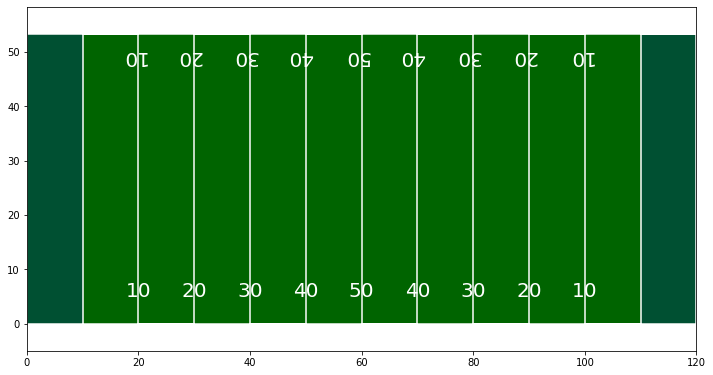

In [43]:
# Create a rectangle defined via an anchor point *xy* and its *width* and *height*
rect = patches.Rectangle((0, 0), 120, 53.3, facecolor='darkgreen', zorder=0)

# Creating a subplot to plot our field on
fig, ax = plt.subplots(1, figsize=(12, 6.33))

# Adding the rectangle to the plot
ax.add_patch(rect)

# Plotting a line plot for marking the field lines
plt.plot([10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
          80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
         [0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 
          0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
         color='white', zorder = 0)

# Creating the left end-zone
left_end_zone = patches.Rectangle((0, 0), 10, 53.3, facecolor='blue', alpha=0.2, zorder=0)

# Creating the right end-zone
right_end_zone = patches.Rectangle((110, 0), 120, 53.3, facecolor='blue', alpha=0.2, zorder=0)

# Adding the patches to the subplot
ax.add_patch(left_end_zone)
ax.add_patch(right_end_zone)

# Setting the limits of x-axis from 0 to 120
plt.xlim(0, 120)

# Setting the limits of y-axis from -5 to 58.3
plt.ylim(-5, 58.3)

# Removing the axis values from the plot
# plt.axis('off')

# Plotting the numbers starting from x = 20 and ending at x = 110
# with a step of 10
for x in range(20, 110, 10):

    # Intializing another variable named 'number'
    number = x

    # If x exceeds 50, subtract it from 120
    if x > 50:
        number = 120 - x

    # Plotting the text at the bottom
    plt.text(x, 5, str(number - 10),
             horizontalalignment='center',
             fontsize=20,
             color='white')

    # Plotting the text at the top
    plt.text(x - 0.95, 53.3 - 5, str(number - 10),
             horizontalalignment='center',
             fontsize=20,
             color='white',
             rotation=180)

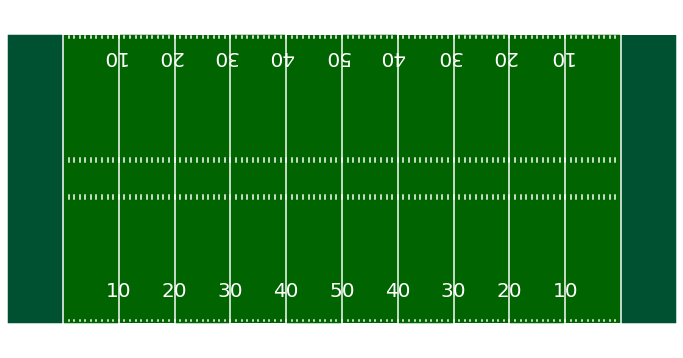

In [44]:
# Create a rectangle defined via an anchor point *xy* and its *width* and *height*
rect = patches.Rectangle((0, 0), 120, 53.3, facecolor='darkgreen', zorder=0)

# Creating a subplot to plot our field on
fig, ax = plt.subplots(1, figsize=(12, 6.33))

# Adding the rectangle to the plot
ax.add_patch(rect)

# Plotting a line plot for marking the field lines
plt.plot([10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
          80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
         [0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 
          0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
         color='white', zorder = 0)

# Creating the left end-zone
left_end_zone = patches.Rectangle((0, 0), 10, 53.3, facecolor='blue', alpha=0.2, zorder=0)

# Creating the right end-zone
right_end_zone = patches.Rectangle((110, 0), 120, 53.3, facecolor='blue', alpha=0.2, zorder=0)

# Adding the patches to the subplot
ax.add_patch(left_end_zone)
ax.add_patch(right_end_zone)

# Setting the limits of x-axis from 0 to 120
plt.xlim(0, 120)

# Setting the limits of y-axis from -5 to 58.3
plt.ylim(-5, 58.3)

# Removing the axis values from the plot
plt.axis('off')

# Plotting the numbers starting from x = 20 and ending at x = 110
# with a step of 10
for x in range(20, 110, 10):

    # Intializing another variable named 'number'
    number = x

    # If x exceeds 50, subtract it from 120
    if x > 50:
        number = 120 - x

    # Plotting the text at the bottom
    plt.text(x, 5, str(number - 10),
             horizontalalignment='center',
             fontsize=20,
             color='white')

    # Plotting the text at the top
    plt.text(x - 0.95, 53.3 - 5, str(number - 10),
             horizontalalignment='center',
             fontsize=20,
             color='white',
             rotation=180)

# Making ground markings
for x in range(11, 110):
        ax.plot([x, x], [0.4, 0.7], color='white', zorder = 0)
        ax.plot([x, x], [53.0, 52.5], color='white', zorder = 0)
        ax.plot([x, x], [22.91, 23.57], color='white', zorder = 0)
        ax.plot([x, x], [29.73, 30.39], color='white', zorder = 0)

In [45]:
def create_football_field():
    
    # Create a rectangle defined via an anchor point *xy* and its *width* and *height*
    rect = patches.Rectangle((0, 0), 120, 53.3, facecolor='darkgreen', zorder=0)

    # Creating a subplot to plot our field on
    fig, ax = plt.subplots(1, figsize=(12, 6.33))

    # Adding the rectangle to the plot
    ax.add_patch(rect)

    # Plotting a line plot for marking the field lines
    plt.plot([10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 
              0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white', zorder = 0)

    # Creating the left end-zone
    left_end_zone = patches.Rectangle((0, 0), 10, 53.3, facecolor='blue', alpha=0.2, zorder=0)

    # Creating the right end-zone
    right_end_zone = patches.Rectangle((110, 0), 120, 53.3, facecolor='blue', alpha=0.2, zorder=0)

    # Adding the patches to the subplot
    ax.add_patch(left_end_zone)
    ax.add_patch(right_end_zone)

    # Setting the limits of x-axis from 0 to 120
    plt.xlim(0, 120)

    # Setting the limits of y-axis from -5 to 58.3
    plt.ylim(-5, 58.3)

    # Removing the axis values from the plot
    plt.axis('off')

    # Plotting the numbers starting from x = 20 and ending at x = 110
    # with a step of 10
    for x in range(20, 110, 10):

        # Intializing another variable named 'number'
        number = x

        # If x exceeds 50, subtract it from 120
        if x > 50:
            number = 120 - x

        # Plotting the text at the bottom
        plt.text(x, 5, str(number - 10),
                 horizontalalignment='center',
                 fontsize=20,
                 color='white')

        # Plotting the text at the top
        plt.text(x - 0.95, 53.3 - 5, str(number - 10),
                 horizontalalignment='center',
                 fontsize=20,
                 color='white',
                 rotation=180)

    # Making ground markings
    for x in range(11, 110):
            ax.plot([x, x], [0.4, 0.7], color='white', zorder = 0)
            ax.plot([x, x], [53.0, 52.5], color='white', zorder = 0)
            ax.plot([x, x], [22.91, 23.57], color='white', zorder = 0)
            ax.plot([x, x], [29.73, 30.39], color='white', zorder = 0)
    
    # Returning the figure and axis
    return fig, ax

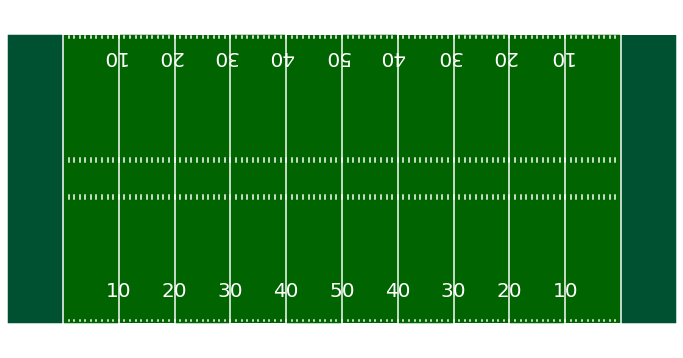

In [46]:
# Calling the plotting function
fig, ax = create_football_field()

# Plotting the figure
plt.show()

In [47]:
# Reading the data as a Pandas DataFrame
df = pd.read_csv('../input/beginners-sports-analytics-nfl-dataset/week_data.csv')

In [48]:
# Looking at the first five rows of the DataFrame 
df.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-11-16T01:24:15.799Z,77.97,18.61,0.00,0.00,0.00,109.88,289.98,None,497236.0,Jimmy Graham,80.0,TE,1,away,2018111500,90,right,CROSS
1,2018-11-16T01:24:15.799Z,79.41,23.71,0.00,0.00,0.00,90.31,159.68,None,2506363.0,Aaron Rodgers,12.0,QB,1,away,2018111500,90,right,NaN
2,2018-11-16T01:24:15.799Z,85.05,22.71,0.00,0.00,0.00,288.53,141.92,None,2532966.0,Bobby Wagner,54.0,MLB,1,home,2018111500,90,right,NaN
3,2018-11-16T01:24:15.799Z,84.81,17.84,0.01,0.01,0.01,283.13,295.48,None,2539243.0,Bradley McDougald,30.0,SS,1,home,2018111500,90,right,NaN
4,2018-11-16T01:24:15.799Z,85.35,27.05,0.00,0.00,0.00,251.12,350.19,None,2540140.0,Barkevious Mingo,51.0,OLB,1,home,2018111500,90,right,NaN


In [49]:
# Looking at the shape of the DataFrame
df.shape

(932240, 19)

In [50]:
# Converting to Time values
df['time'] = pd.to_datetime(df['time']).dt.time

# Looking at the first five rows of the DataFrame 
df.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,01:24:15.799000,77.97,18.61,0.00,0.00,0.00,109.88,289.98,None,497236.0,Jimmy Graham,80.0,TE,1,away,2018111500,90,right,CROSS
1,01:24:15.799000,79.41,23.71,0.00,0.00,0.00,90.31,159.68,None,2506363.0,Aaron Rodgers,12.0,QB,1,away,2018111500,90,right,NaN
2,01:24:15.799000,85.05,22.71,0.00,0.00,0.00,288.53,141.92,None,2532966.0,Bobby Wagner,54.0,MLB,1,home,2018111500,90,right,NaN
3,01:24:15.799000,84.81,17.84,0.01,0.01,0.01,283.13,295.48,None,2539243.0,Bradley McDougald,30.0,SS,1,home,2018111500,90,right,NaN
4,01:24:15.799000,85.35,27.05,0.00,0.00,0.00,251.12,350.19,None,2540140.0,Barkevious Mingo,51.0,OLB,1,home,2018111500,90,right,NaN


In [51]:
# Sorting the values of the DataFrame by time in an ascending order
df = df.sort_values(by='time', ascending=True).reset_index(drop=True)

# Looking at the first five rows of the DataFrame 
df.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,00:00:38.500000,86.80,44.97,0.01,0.01,0.01,265.98,318.85,None,2552600.0,Nelson Agholor,13.0,WR,1,away,2018111809,3294,left,GO
1,00:00:38.500000,80.39,37.16,0.08,0.23,0.01,89.72,339.97,None,2552484.0,P.J. Williams,26.0,CB,1,home,2018111809,3294,left,NaN
2,00:00:38.500000,86.34,36.31,0.00,0.00,0.00,285.81,269.36,None,497326.0,Golden Tate,19.0,WR,1,away,2018111809,3294,left,SCREEN
3,00:00:38.500000,85.10,23.74,0.00,0.00,0.00,NaN,NaN,None,NaN,Football,NaN,NaN,1,football,2018111809,3294,left,NaN
4,00:00:38.500000,86.82,7.17,0.03,0.02,0.01,263.02,288.96,None,2560949.0,Josh Adams,33.0,RB,1,away,2018111809,3294,left,GO


In [52]:
# Selecting the data for the given game and play based on their Id
sel_df = df.query('gameId == 2018111900 and playId == 5577')

# Looking at the shape of the DataFrame
print(f'The shape of the DataFrame is: {sel_df.shape}')

# Looking at the DataFrame
sel_df

The shape of the DataFrame is: (1770, 19)


,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
282518,04:57:48,84.26,23.74,0.00,0.00,0.00,NaN,NaN,None,NaN,Football,NaN,NaN,1,football,2018111900,5577,left,NaN
282519,04:57:48,83.26,29.86,0.00,0.00,0.00,64.10,79.64,None,2558830.0,Samson Ebukam,50.0,OLB,1,home,2018111900,5577,left,NaN
282520,04:57:48,63.54,18.25,0.07,0.76,0.01,67.33,3.53,None,2558183.0,John Johnson,43.0,SS,1,home,2018111900,5577,left,NaN
282521,04:57:48,88.42,23.54,0.11,0.04,0.01,272.66,325.11,None,2558125.0,Patrick Mahomes,15.0,QB,1,away,2018111900,5577,left,NaN
282522,04:57:48,79.76,26.36,0.01,0.01,0.00,105.22,4.91,None,2556593.0,Cory Littleton,58.0,ILB,1,home,2018111900,5577,left,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284283,04:57:59.700000,60.25,29.51,6.40,2.21,0.65,314.31,294.95,None,2540204.0,Spencer Ware,32.0,RB,118,away,2018111900,5577,left,FLAT
284284,04:57:59.700000,63.23,45.92,3.81,1.20,0.37,257.27,262.77,None,1037374.0,Sam Shields,37.0,CB,118,home,2018111900,5577,left,NaN
284285,04:57:59.700000,52.42,49.74,3.74,1.48,0.38,12.75,290.79,None,2553536.0,Troy Hill,32.0,CB,118,home,2018111900,5577,left,NaN
284286,04:57:59.700000,84.26,28.11,1.73,0.54,0.17,260.29,249.13,None,2558830.0,Samson Ebukam,50.0,OLB,118,home,2018111900,5577,left,NaN


In [53]:
# Selecting the home and away team
home_team = sel_df.query('team == "home"')
away_team = sel_df.query('team == "away"')

# Selecting the football
football = sel_df.query('team == "football"')

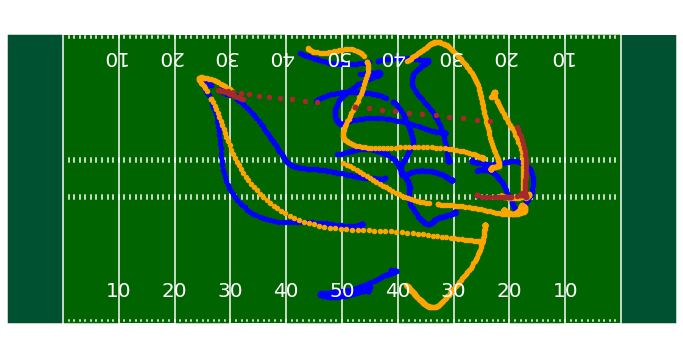

In [54]:
# Creating the football field
fig, ax = create_football_field()

# Plotitng the home team
home_team.plot(x='x', y='y', kind='scatter', ax=ax, color='blue', s=20, zorder=2)

# Plotting the away team
away_team.plot(x='x', y='y', kind='scatter', ax=ax, color='orange', s=20, zorder=2)

# Plotting the football
football.plot(x='x', y='y', kind='scatter', ax=ax, color='brown', s=20, zorder=2)

# Displaying the plot
plt.show()

In [55]:
sel_df['event'].unique()

array(['None', 'ball_snap', 'first_contact', 'pass_forward',
       'pass_outcome_interception', 'tackle'], dtype=object)

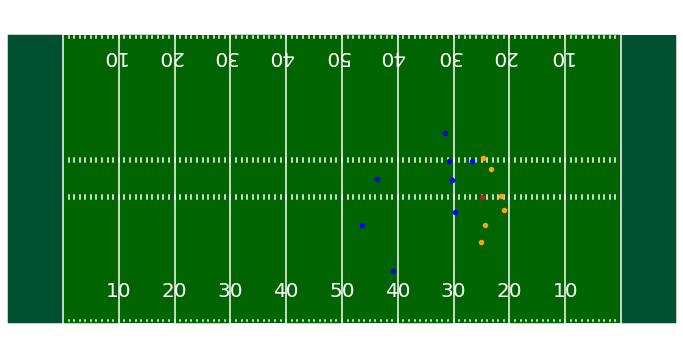

In [56]:
# Creating the football field
fig, ax = create_football_field()

# Plotitng the home team
home_team.query('event == "ball_snap"').plot(x='x', y='y', kind='scatter', ax=ax, color='blue', s=20, zorder=2)

# Plotting the away team
away_team.query('event == "ball_snap"').plot(x='x', y='y', kind='scatter', ax=ax, color='orange', s=20, zorder=2)

# Plotting the football
football.query('event == "ball_snap"').plot(x='x', y='y', kind='scatter', ax=ax, color='brown', s=20, zorder=2)

# Displaying the plot
plt.show()